In [1]:
import keras
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
train_data.shape, test_data.shape

((8982,), (2246,))

In [3]:
# IMDB처럼 각 샘플은 정수 리스트임
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
import numpy as np
def vectorsize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorsize_sequences(train_data)
x_test = vectorsize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
# imdb에서는 16차원을 사용했는데, 46개의 클래스를 구분하기에 16개는 작음.
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [9]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
# 훈련 검증 셋
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 256us/step - loss: 2.5391 - acc: 0.5021 - val_loss: 1.7266 - val_acc: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 134us/step - loss: 1.3907 - acc: 0.7013 - val_loss: 1.3022 - val_acc: 0.7010
Epoch 3/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.0202 - acc: 0.7798 - val_loss: 1.1127 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.7985 - acc: 0.8306 - val_loss: 1.0279 - val_acc: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.6338 - acc: 0.8703 - val_loss: 0.9764 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.5071 - acc: 0.8969 - val_loss: 0.9243 - val_acc: 0.8060
Epoch 7/20
7982/7982 [============

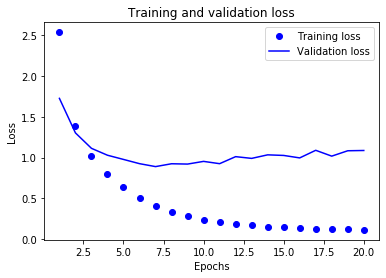

In [13]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

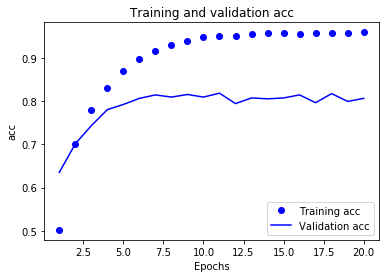

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [15]:
# 9번쯤부터 과대적합
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 163us/step - loss: 2.5614 - acc: 0.5248 - val_loss: 1.7329 - val_acc: 0.6440
Epoch 2/9
7982/7982 [==============================] - 1s 134us/step - loss: 1.4137 - acc: 0.7073 - val_loss: 1.2886 - val_acc: 0.7180
Epoch 3/9
7982/7982 [==============================] - 1s 137us/step - loss: 1.0345 - acc: 0.7780 - val_loss: 1.1138 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.8025 - acc: 0.8306 - val_loss: 1.0126 - val_acc: 0.7790
Epoch 5/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.6313 - acc: 0.8711 - val_loss: 0.9393 - val_acc: 0.8050
Epoch 6/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.5019 - acc: 0.8988 - val_loss: 0.9696 - val_acc: 0.7920
Epoch 7/9
7982/7982 [==============================] - 1s 137us/step - loss: 0.4029 - acc: 0.9171 - val_loss: 0.8781 - val_acc: 0.8200
Epoch 8

In [16]:
results

[0.99731012019109, 0.7831700801424755]

In [17]:
# 무작위로 분류했을 때의 정확도
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19056099732858414

In [18]:
model.predict(x_test)

array([[4.4665223e-05, 2.0942486e-04, 2.4380524e-05, ..., 1.3772828e-05,
        2.1128390e-06, 2.3466499e-05],
       [1.7188819e-02, 2.5852695e-01, 1.9912519e-04, ..., 8.4725994e-05,
        3.2118085e-05, 6.8242929e-04],
       [8.0394782e-03, 6.5011901e-01, 1.4001336e-03, ..., 1.4593790e-03,
        9.7753375e-04, 3.1424270e-03],
       ...,
       [1.5988813e-05, 2.3053080e-04, 8.2679442e-05, ..., 2.2671347e-05,
        1.2172165e-05, 2.2159244e-05],
       [2.0486207e-03, 7.7420980e-02, 2.4656411e-03, ..., 5.1655667e-04,
        3.0536106e-04, 1.5444655e-03],
       [4.2801700e-04, 6.9406509e-01, 9.2616919e-03, ..., 1.0800565e-03,
        2.7493836e-04, 3.4416709e-04]], dtype=float32)

In [19]:
[np.argmax(i) for i in model.predict(x_test)]

[3,
 10,
 1,
 16,
 13,
 3,
 3,
 3,
 3,
 3,
 1,
 4,
 1,
 3,
 1,
 11,
 3,
 3,
 19,
 3,
 8,
 3,
 3,
 3,
 9,
 3,
 4,
 6,
 10,
 3,
 3,
 10,
 4,
 3,
 19,
 4,
 19,
 1,
 4,
 3,
 3,
 21,
 3,
 34,
 4,
 4,
 3,
 4,
 3,
 11,
 20,
 3,
 3,
 3,
 3,
 4,
 26,
 4,
 20,
 19,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 1,
 3,
 4,
 19,
 4,
 3,
 19,
 43,
 24,
 1,
 3,
 10,
 4,
 3,
 3,
 3,
 9,
 19,
 20,
 1,
 21,
 4,
 3,
 3,
 4,
 3,
 19,
 3,
 16,
 11,
 3,
 4,
 1,
 41,
 3,
 20,
 3,
 3,
 3,
 4,
 13,
 4,
 4,
 19,
 3,
 4,
 3,
 16,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 19,
 4,
 18,
 3,
 19,
 3,
 4,
 3,
 8,
 3,
 1,
 3,
 3,
 4,
 13,
 1,
 3,
 3,
 3,
 3,
 4,
 4,
 20,
 1,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 1,
 3,
 3,
 11,
 17,
 3,
 20,
 2,
 4,
 3,
 4,
 3,
 1,
 3,
 3,
 3,
 20,
 3,
 3,
 3,
 21,
 4,
 17,
 3,
 3,
 3,
 8,
 3,
 20,
 3,
 21,
 3,
 3,
 6,
 35,
 8,
 3,
 11,
 11,
 8,
 1,
 3,
 4,
 4,
 4,
 16,
 16,
 19,
 19,
 3,
 4,
 4,
 19,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 20,
 4,
 20,
 3,
 3,
 3,
 3,
 3,
 4,
 13,
 3,
 13,
 16,
 4,
 3,
 4,
 19,
 3,
 11,
 9,


In [0]:
# label을 인코딩하는 다른 방법
# model.compile에서 loss를 sparse_categorical_corssentropy로 바꿔주면 댐

In [22]:
# 타깃을 one hot 안 해줄 거면 loss값만 바꾸면 됨
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 169us/step - loss: 2.6100 - acc: 0.5279 - val_loss: 1.7344 - val_acc: 0.6180
Epoch 2/9
7982/7982 [==============================] - 1s 136us/step - loss: 1.4083 - acc: 0.6982 - val_loss: 1.3091 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 137us/step - loss: 1.0431 - acc: 0.7795 - val_loss: 1.1240 - val_acc: 0.7700
Epoch 4/9
7982/7982 [==============================] - 1s 137us/step - loss: 0.8193 - acc: 0.8239 - val_loss: 1.0364 - val_acc: 0.7940
Epoch 5/9
7982/7982 [==============================] - 1s 142us/step - loss: 0.6547 - acc: 0.8616 - val_loss: 0.9670 - val_acc: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 143us/step - loss: 0.5245 - acc: 0.8906 - val_loss: 0.9751 - val_acc: 0.7860
Epoch 7/9
7982/7982 [==============================] - 1s 140us/step - loss: 0.4223 - acc: 0.9109 - val_loss: 0.9187 - val_acc: 0.8140
Epoch 8

In [23]:
results = model.evaluate(x_test, test_labels)

2246/2246 [==============================] - 0s 104us/step


In [24]:
## 중간 출력이 항상 최종 출력 이상이여야 하는 이유
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 233us/step - loss: 3.4148 - acc: 0.0479 - val_loss: 2.9511 - val_acc: 0.2160
Epoch 2/20
7982/7982 [==============================] - 2s 191us/step - loss: 2.3648 - acc: 0.5050 - val_loss: 1.9223 - val_acc: 0.5940
Epoch 3/20
7982/7982 [==============================] - 2s 188us/step - loss: 1.6257 - acc: 0.6477 - val_loss: 1.6025 - val_acc: 0.6650
Epoch 4/20
7982/7982 [==============================] - 2s 191us/step - loss: 1.3991 - acc: 0.6989 - val_loss: 1.5333 - val_acc: 0.6610
Epoch 5/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.2900 - acc: 0.7112 - val_loss: 1.5235 - val_acc: 0.6740
Epoch 6/20
7982/7982 [==============================] - 1s 188us/step - loss: 1.2136 - acc: 0.7159 - val_loss: 1.5092 - val_acc: 0.6670
Epoch 7/20
7982/7982 [==============================] - 1s 187us/step - loss: 1.1521 - acc: 0.7238 - val_loss: 1.5042 - val_acc: 0.6710


In [25]:
model.evaluate(x_test, test_labels)

2246/2246 [==============================] - 0s 106us/step


[1.9492212617811304, 0.6625111308993766]

In [26]:
## 층의 유닛을 늘려보자
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
model.evaluate(x_test, test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 347us/step - loss: 1.5765 - acc: 0.6511 - val_loss: 1.0868 - val_acc: 0.7630
Epoch 2/20
7982/7982 [==============================] - 2s 299us/step - loss: 0.7669 - acc: 0.8360 - val_loss: 1.0252 - val_acc: 0.7680
Epoch 3/20
7982/7982 [==============================] - 2s 302us/step - loss: 0.4641 - acc: 0.9012 - val_loss: 0.8466 - val_acc: 0.8280
Epoch 4/20
7982/7982 [==============================] - 2s 296us/step - loss: 0.3081 - acc: 0.9316 - val_loss: 0.9428 - val_acc: 0.8000
Epoch 5/20
7982/7982 [==============================] - 2s 292us/step - loss: 0.2353 - acc: 0.9441 - val_loss: 0.9849 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 2s 302us/step - loss: 0.1947 - acc: 0.9509 - val_loss: 1.0443 - val_acc: 0.7920
Epoch 7/20
7982/7982 [==============================] - 2s 297us/step - loss: 0.1737 - acc: 0.9518 - val_loss: 1.0287 - val_acc: 0.7980


[1.5203993528524045, 0.7813891362952846]

In [27]:
## 층을 늘려보자
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
model.evaluate(x_test, test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 244us/step - loss: 1.8880 - acc: 0.5858 - val_loss: 1.2844 - val_acc: 0.7050
Epoch 2/20
7982/7982 [==============================] - 2s 191us/step - loss: 1.0408 - acc: 0.7675 - val_loss: 1.1064 - val_acc: 0.7570
Epoch 3/20
7982/7982 [==============================] - 2s 192us/step - loss: 0.7084 - acc: 0.8419 - val_loss: 0.9676 - val_acc: 0.8090
Epoch 4/20
7982/7982 [==============================] - 2s 200us/step - loss: 0.4791 - acc: 0.8941 - val_loss: 0.9609 - val_acc: 0.8110
Epoch 5/20
7982/7982 [==============================] - 2s 193us/step - loss: 0.3415 - acc: 0.9194 - val_loss: 0.9902 - val_acc: 0.8060
Epoch 6/20
7982/7982 [==============================] - 2s 199us/step - loss: 0.2622 - acc: 0.9379 - val_loss: 1.0226 - val_acc: 0.8180
Epoch 7/20
7982/7982 [==============================] - 2s 198us/step - loss: 0.2198 - acc: 0.9454 - val_loss: 1.1005 - val_acc: 0.7990


[1.4642731585039799, 0.772484416793949]

In [28]:
## 층을 줄여보자
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
model.evaluate(x_test, test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 247us/step - loss: 1.8599 - acc: 0.6478 - val_loss: 1.1894 - val_acc: 0.7380
Epoch 2/20
7982/7982 [==============================] - 2s 197us/step - loss: 0.9306 - acc: 0.8072 - val_loss: 0.9570 - val_acc: 0.8050
Epoch 3/20
7982/7982 [==============================] - 2s 196us/step - loss: 0.6332 - acc: 0.8685 - val_loss: 0.8720 - val_acc: 0.8150
Epoch 4/20
7982/7982 [==============================] - 2s 194us/step - loss: 0.4487 - acc: 0.9082 - val_loss: 0.8384 - val_acc: 0.8210
Epoch 5/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.3353 - acc: 0.9285 - val_loss: 0.8136 - val_acc: 0.8290
Epoch 6/20
7982/7982 [==============================] - 2s 189us/step - loss: 0.2634 - acc: 0.9391 - val_loss: 0.8198 - val_acc: 0.8360
Epoch 7/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.2165 - acc: 0.9468 - val_loss: 0.8301 - val_acc: 0.8310


[1.2920923349800009, 0.7880676759212865]